In [1]:
!git clone https://github.com/anantgupta129/TorcHood.git


Cloning into 'TorcHood'...
remote: Enumerating objects: 997, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 997 (delta 5), reused 13 (delta 5), pack-reused 984
Receiving objects: 100% (997/997), 511.08 KiB | 12.17 MiB/s, done.
Resolving deltas: 100% (688/688), done.


In [2]:
%cd TorcHood

/content/TorcHood


In [ ]:
!pip install wandb
!wandb login

In [ ]:
!pip install .

In [4]:
import warnings
warnings.filterwarnings("ignore")

import os
import torch
import lightning.pytorch as pl

from torchood.data.cifar_datamodule import CIFAR10DataModule
from torchood.models.variational_auto_encoders_module import VAE

In [17]:
datamodule = CIFAR10DataModule()

Files already downloaded and verified
Files already downloaded and verified


In [6]:
datamodule.val_dataloader, datamodule.train_dataloader

(<bound method CIFAR10DataModule.val_dataloader of <__main__.CIFAR10DataModule object at 0x7e686cdac580>>,
 <bound method CIFAR10DataModule.train_dataloader of <__main__.CIFAR10DataModule object at 0x7e686cdac580>>)

In [36]:
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch import Trainer

# Optional: Logging with Weights & Biases
logger = [WandbLogger(project="VAE-CIFAR"),CSVLogger(save_dir="csv_logs")]
model = VAE()
trainer = Trainer( max_epochs=60, accelerator="gpu",logger=logger)
trainer.fit(model=model, datamodule=datamodule)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name | Type   | Params
--------------------------------
0 | net  | VAENet | 20.9 M
--------------------------------
20.9 M    Trainable params
0         Non-trainable params
20.9 M    Total params
83.751    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name | Type   | Params
--------------------------------
0 | net  | VAENet | 20.9 M
--------------------------------
20.9 M    Trainable params
0         Non-trainable params
20.9 M    Total params
83.751    Total estimated model params 

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=60` reached.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
trainer.save_checkpoint("trained_cifar_model.ckpt")

In [38]:
!cp /content/TorcHood/trained_cifar_model.ckpt /content/drive/MyDrive

In [ ]:
vae = VAE.load_from_checkpoint("model.ckpt")

<Figure size 2400x900 with 0 Axes>

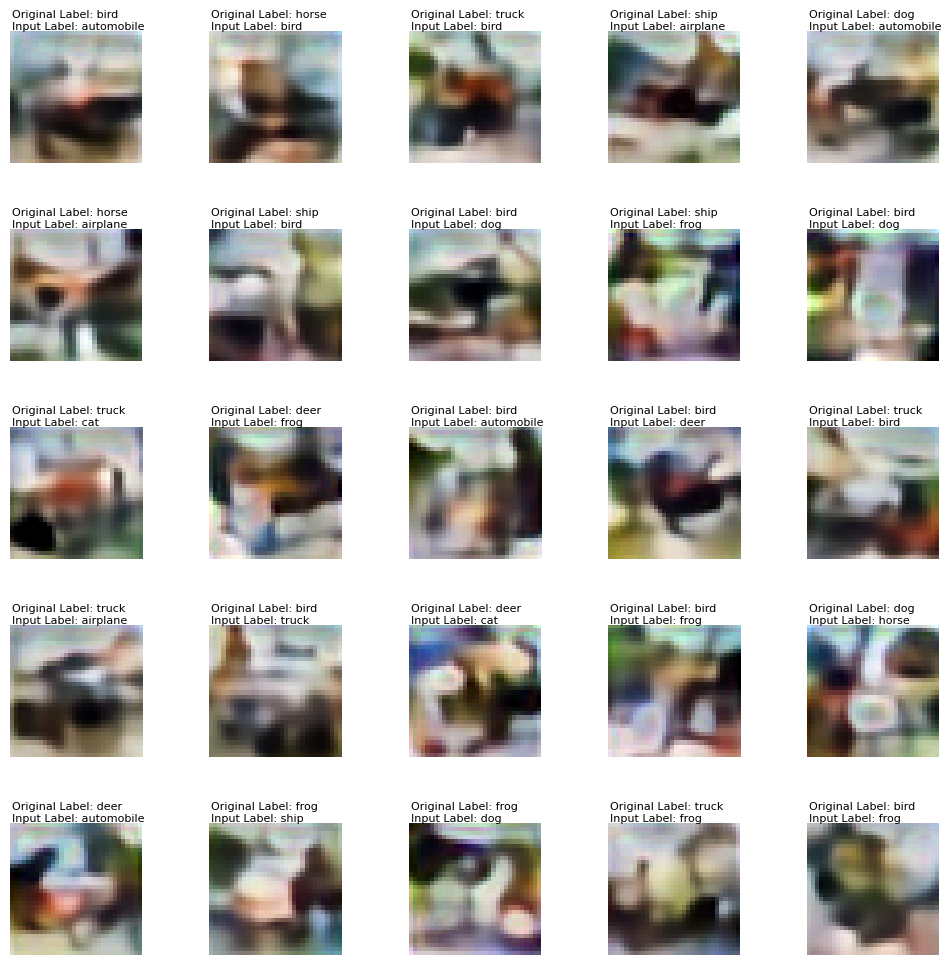

In [34]:
from torchood.utils.plotting import plot_vae_examples
test_loader = datamodule.val_dataloader()
test_data = datamodule.val_data()
mean = (0.49139968, 0.48215841, 0.44653091)
std = (0.24703223, 0.24348513, 0.26158784)
vae.to("cuda")
plot_vae_examples(test_loader,test_data, vae.net, mean, std)